# A Brief Introduction to Matplotlib

In this notebook, we will cover the basics of Matplotlib, a powerful, prolific library 
for organizing and visualizing data of all kinds. If you work in science, chances are you'll
find a use case for this. Enjoy!

In [226]:
import matplotlib.pyplot as plt
import numpy as np

Now, let's make our first plot - a line graph! We're going to visualize data related to CO2 emissions.

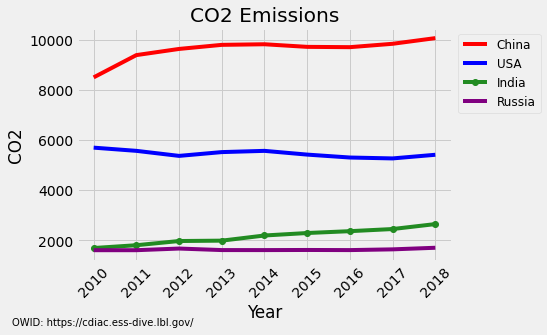

In [191]:
# Use numpy to generate range of years to cover
years = np.arange(2010, 2019)

# Emissions data for China
china_emissions = [8500.543, 9388.199, 9633.899, 9796.527, 9820.36, 9716.468, 9704.479, 9838.754, 10064.686]
plt.plot(years, china_emissions, label='China', color='red')

# Emissions data for USA
us_emissions = [5700.108, 5572.585, 5371.777, 5522.908, 5572.106, 5422.966, 5306.662, 5270.749, 5416.278]
plt.plot(years, us_emissions, label='USA', color='blue')

# Emissions data for India
india_emissions = [1700.027, 1811.961, 1979.047, 1994.101, 2199.4, 2298.17, 2371.752, 2456.954, 2654.101]
plt.plot(years, india_emissions, marker="o", label='India', color='#228B22')

russia_emissions = [1613.523, 1613.523, 1679.385, 1618.434, 1617.678, 1622.498, 1617.653, 1647.041, 1710.688]
plt.plot(years, russia_emissions, label='Russia', color='purple')

# Add style to the x ticks
plt.xticks(ticks=years, labels=years, rotation=45)

# Change scaling for y axis
# plt.axis([2010, 2018, 0, 30])

# Add labels
plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('CO2 Emissions')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 12})

# Ensure a tight, uncluttered layout
# plt.tight_layout()

# Save the figure
plt.savefig('./out/co2_plot1.png')
plt.savefig('./out/co2_plot2.jpg')
plt.savefig('./out/co2_plot3.svg')

# Annotate with source
# Placement of annotation is fraction of the axes coordinate system
# Placement of text is an offset in points
plt.annotate('OWID: https://cdiac.ess-dive.lbl.gov/', (0,0), (-65,-65), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points')

# Set the plot style
plt.style.use('fivethirtyeight')

# Show the figure
plt.show()

Looks pretty good! But it's hard to see the relationship between Russia and the other countries. Let's transform this into a bar graph.

Text(0.5, 1.0, 'CO2 Emissions - 2010')

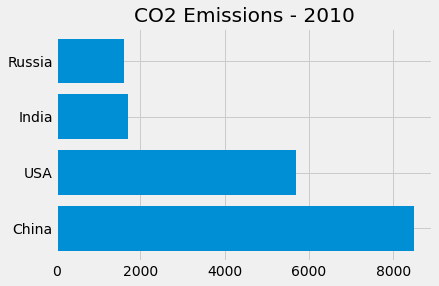

In [229]:
emissions_arr = [china_emissions[0], us_emissions[0], india_emissions[0], russia_emissions[0]]
countries = ['China', 'USA', 'India', 'Russia']
# plt.bar(countries, emissions_arr)
plt.barh(countries, emissions_arr)
plt.title('CO2 Emissions - 2010')

Text(0.5, 1.0, 'CO2 Emissions by Year')

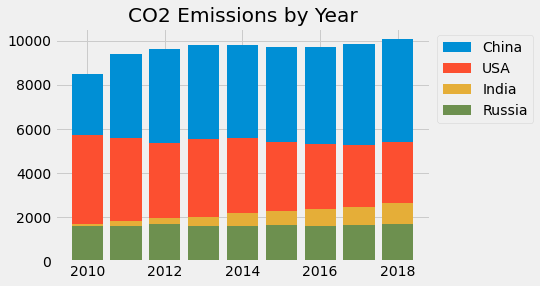

In [230]:
# Stacked bar chart
plt.bar(years, china_emissions)
plt.bar(years, us_emissions)
plt.bar(years, india_emissions)
plt.bar(years, russia_emissions)
plt.legend(['China', 'USA', 'India', 'Russia'], bbox_to_anchor=(1, 1))
plt.title('CO2 Emissions by Year')

Text(0.5, 1.0, 'CO2 Emissions by Year')

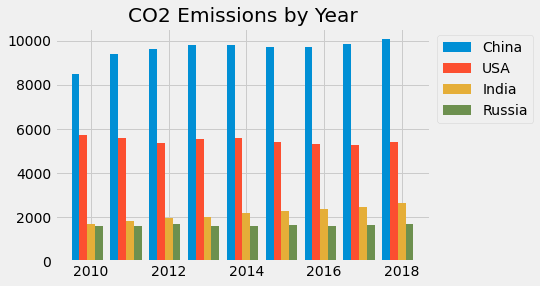

In [231]:
# Grouped bar chart
width = 0.2
plt.bar(years - (width * 2), china_emissions, width=width)
plt.bar(years - width, us_emissions, width=width)
plt.bar(years, india_emissions, width=width)
plt.bar(years + width, russia_emissions, width=width)
plt.legend(['China', 'USA', 'India', 'Russia'], bbox_to_anchor=(1, 1))
plt.title('CO2 Emissions by Year')

Great! Now let's explore this data as a percentage of the total global emissions.

Text(-65, -65, 'OWID: https://cdiac.ess-dive.lbl.gov/')

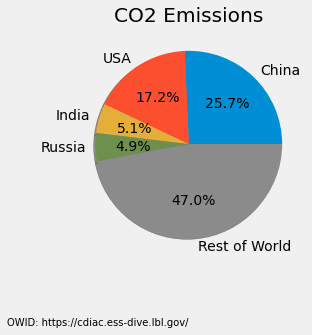

In [232]:
# Total global emissions for those years
world_emissions = [33066.651, 34357.366, 34919.289, 35207.886, 35505.827, 35462.747, 35675.099, 36153.262, 36572.754]

year_idx = 0

# Get percentage of total emissions contributed by China for 2010
china_prct = (china_emissions[year_idx] / world_emissions[year_idx]) * 100
us_prct = (us_emissions[year_idx] / world_emissions[year_idx]) * 100
india_prct = (india_emissions[year_idx] / world_emissions[year_idx]) * 100
russia_prct = (russia_emissions[year_idx] / world_emissions[year_idx]) * 100
world_prct = 100
other_prct = (world_prct - (china_prct + us_prct + india_prct + russia_prct)) / world_prct * 100

percentages = [china_prct, us_prct, india_prct, russia_prct, other_prct]

plt.pie(
    x=percentages, 
    shadow=True, 
    labels=['China', 'USA', 'India', 'Russia', 'Rest of World'], 
    autopct='%1.1f%%',
    # explode=[0,0.1,0.2,0.3,0.1],
    # startangle=90
    )

plt.title('CO2 Emissions')
plt.annotate('OWID: https://cdiac.ess-dive.lbl.gov/', (0,0), (-65,-65), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points')

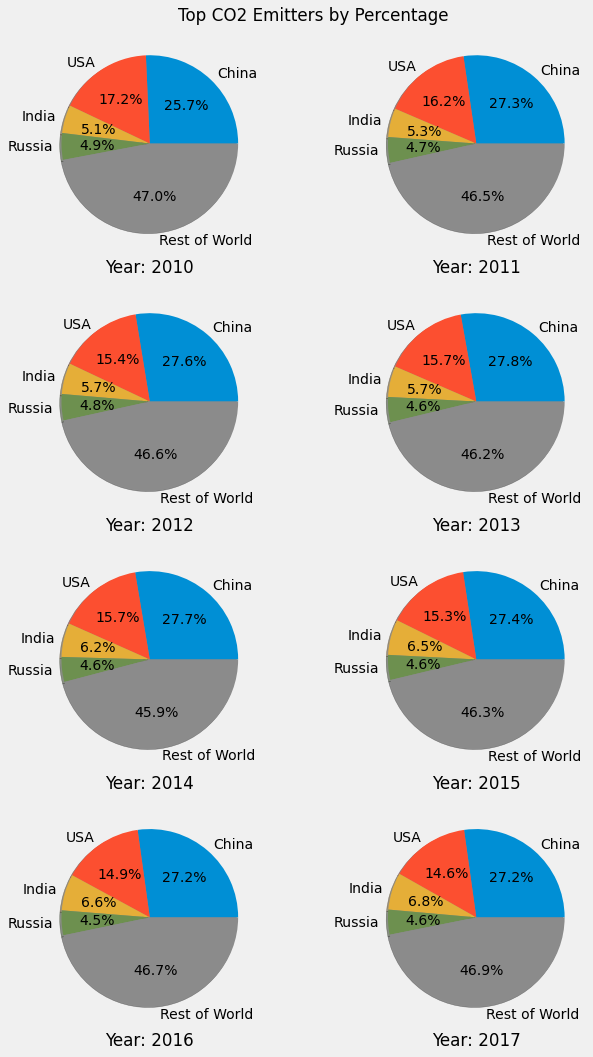

In [233]:
year_idx = 0
fig, axes = plt.subplots(nrows=4, ncols=2)
for row in axes:
    for col in row:
        china_prct = (china_emissions[year_idx] / world_emissions[year_idx]) * 100
        us_prct = (us_emissions[year_idx] / world_emissions[year_idx]) * 100
        india_prct = (india_emissions[year_idx] / world_emissions[year_idx]) * 100
        russia_prct = (russia_emissions[year_idx] / world_emissions[year_idx]) * 100
        world_prct = 100
        other_prct = (world_prct - (china_prct + us_prct + india_prct + russia_prct)) / world_prct * 100
        percentages = [china_prct, us_prct, india_prct, russia_prct, other_prct]

        col.pie(
            x=percentages, 
            shadow=True, 
            labels=['China', 'USA', 'India', 'Russia', 'Rest of World'], 
            autopct='%1.1f%%',
            # explode=[0,0.1,0.2,0.3,0.1],
            # startangle=90
        )
        col.set_xlabel(f'Year: {years[year_idx]}')
        year_idx = year_idx + 1

fig.set_size_inches(10, 15)
fig.suptitle('Top CO2 Emitters by Percentage')
fig.tight_layout()
fig.show()